In [1]:
# for explority data analysis this lib are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
#first load the data
df =pd.read_csv(r"Visadataset.csv")


In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
#first we have to do explority analysis after that we have some ideas that which column is important 
#which is not required for analysis, remove that column

#to check the columns and dat
df.shape

(25480, 12)

In [5]:
#display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


check datatypes in the dataset

In [6]:
#check NULL and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


EXPLORING THE DATA

In [ ]:
#first separate numeric(numbers) and catagorical(not number) types data
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O'] #for checking data are not equal to string i.e, it is numeric data
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
#print columns
print('we have {} numeric features: {}'.format(len(numeric_features),numeric_features))
print("we have {} categorical features {}".format(len(categorical_features),categorical_features))

we have 3 numeric features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical features ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [ ]:
#proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100) #calculating distribution of all the column value
    print('--------------------------------')

#in this data the problem is the data are inbalanced

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
--------------------------------
region_of_

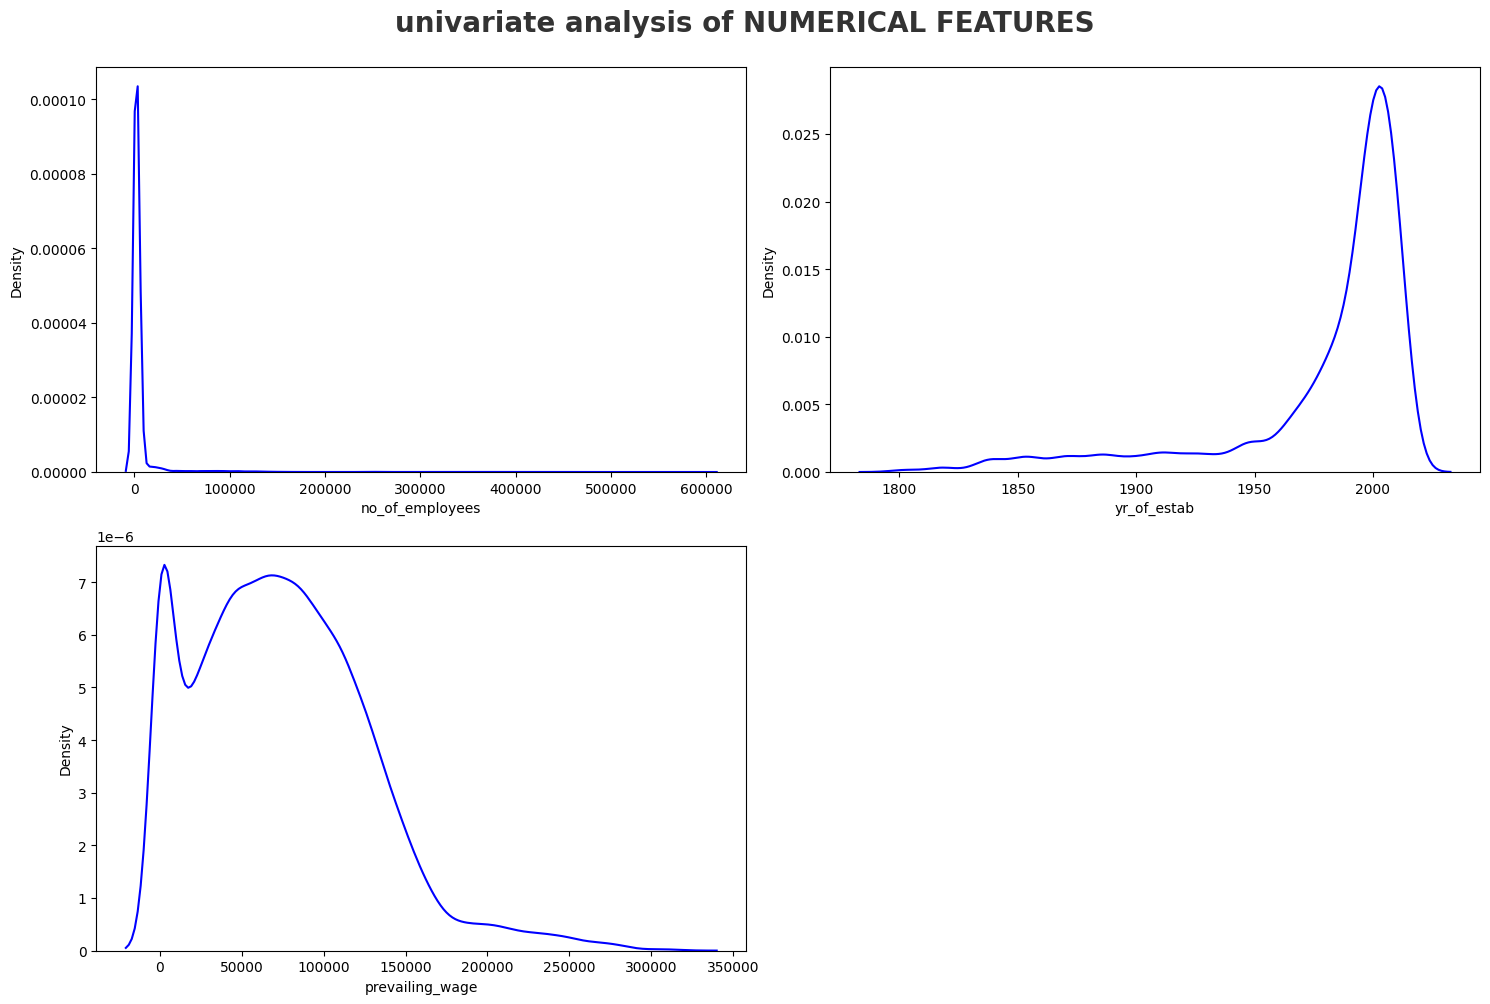

In [ ]:
#univariate analysis of NUMERICAL FEATURES: single variabe analysis
plt.figure(figsize=(15,10)) #figure size
plt.suptitle('univariate analysis of NUMERICAL FEATURES',fontsize=20,fontweight='bold',alpha=0.8,y=1.) #y=1. ensures the title is at the top

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1) #arranges the plots in a grid of 2 rows and 2 columns. The index i+1 ensures that the plots are placed in consecutive positions in the grid.
    sns.kdeplot(x=df[numeric_features[i]], color='blue') # plots the kernel density estimate for the feature with a blue line
    plt.xlabel(numeric_features[i]) #adds a label to the x-axis corresponding to the feature name
    plt.tight_layout() #ensures the subplots fit within the figure without overlapping text or labels.



#Insights of the ablove graph
#no_of_employees column looks more skewed but it may be because of outlies.
#yr_of_estab is a discrete feature.
#privailing-wage is a right-skewed distributio


'case_id' not found in the list.


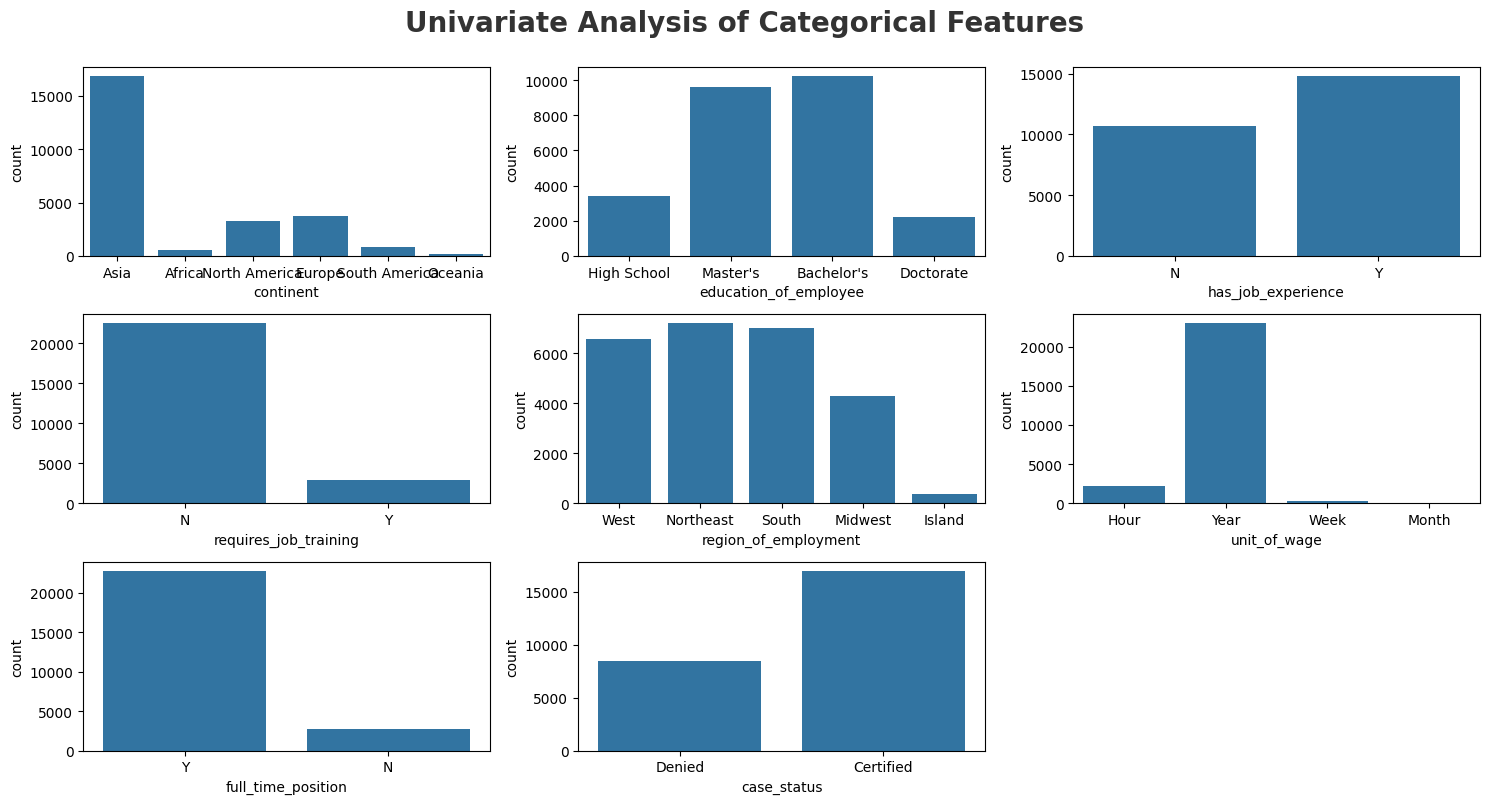

In [ ]:
#univariate analysis of categorical FEATURES: single variabe analysis
# categorical_features.remove('case_id')
if 'case_id' in categorical_features:
    categorical_features.remove('case_id')
else:
    print("'case_id' not found in the list.")

plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

#x variable is categorical, but one of ['numeric', 'datetime'] is required thats why we are using here countplot

#Insights of the graph
# requires_job_training, unit_of_wage, full_time_position and continents coulmns have signle category dominating.
# In rest of the columns are balanced.

In [19]:
#multivariate analysis: 2fetures in this i)discreate fetures ii)continuous features

#first check the discreate and continuous features


discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))






We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [20]:
#check Multicollinearity in Numerical features
#corr
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Insights of multicollinearity

There is no multicollinearity between any variables
Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [ ]:
#*
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

#NOTE: if it is rejected then it is corelated with your target feature
#Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.


,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


In [22]:
#corelation heatmap using seaborn or matplotlib*
#checking NULL VALUES
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [23]:
#check the number of continues features
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)


Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


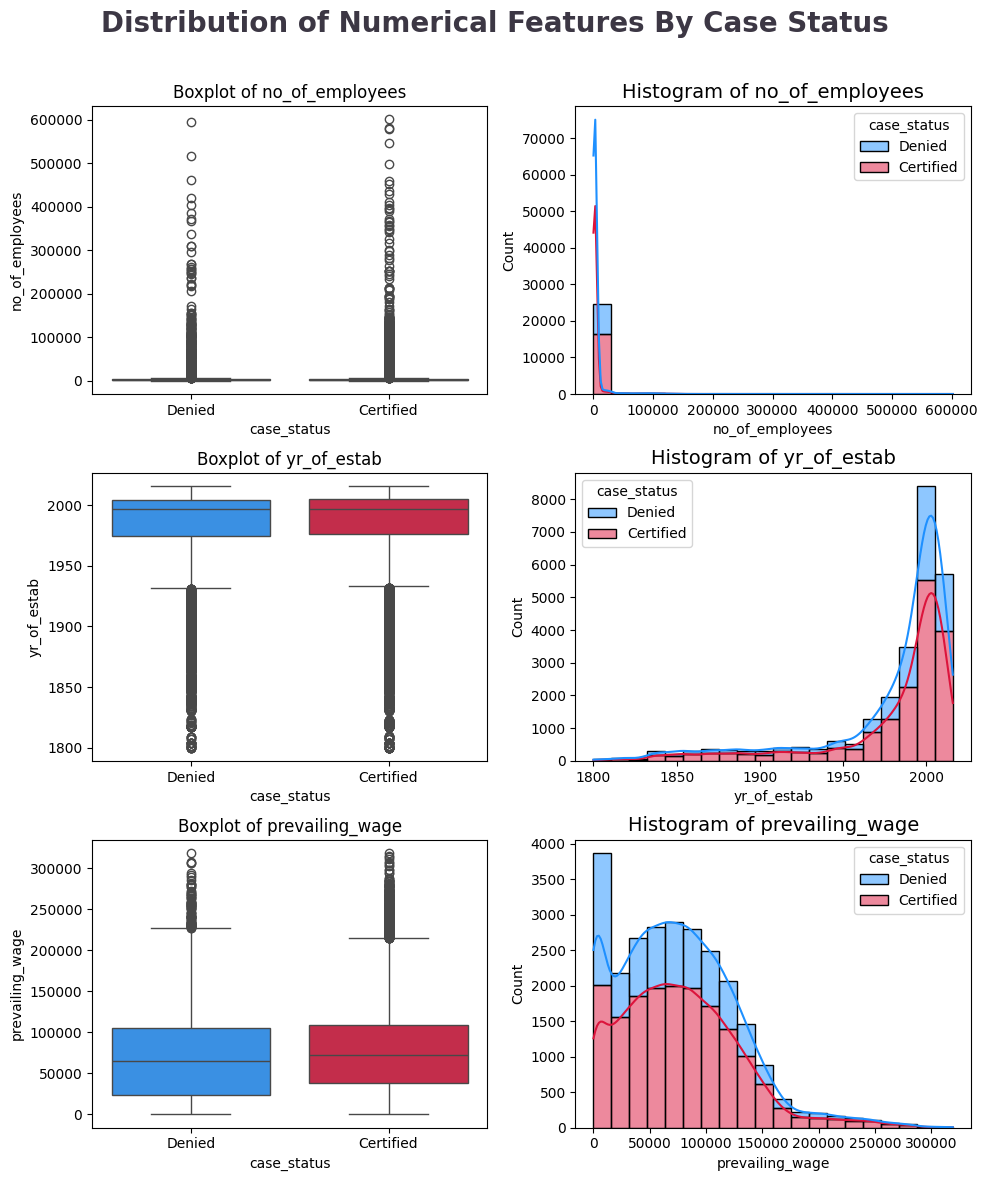

In [ ]:
#*
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12) #boxplot to check the outlier
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)


Initial Analysis Report of above graph

->No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
->yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
->prevailing_wage is right skewed with outliers above upper bound of box plot.
->There are No missing values in the dataset.
->The case_id column can be deleted because each row has unique values.
->The case_status column is the target to predict.
->In the Categorical column, features can be made Binary numerical in feature Encoding

In [ ]:
#Visualization the target feture
